In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb} \usepackage{amsmath}'


In [10]:
%%time
df = pd.read_csv("./data_old/Phones_accelerometer.csv")
df.head()

CPU times: total: 1.69 s
Wall time: 7.18 s


,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


Error in callback <function _draw_all_if_interactive at 0x0000017D106EEC00> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp2ogn01eb 04c169b7ab039060aad4bfb915b2ae76.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.3.31) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(04c169b7ab039060aad4bfb915b2ae76.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-03-14>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Program Files\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Program Files\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Program Files\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Program Files\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Program Files\MiKTeX\tex/latex/amsfonts\amssymb.sty
(C:\Program Files\MiKTeX\tex/latex/amsfonts\amsfonts.sty))
(C:\Program Files\MiKTeX\tex/latex/amsmath\amsmath.sty
For additional information on amsmath, use the `?' option.
(C:\Program Files\MiKTeX\tex/latex/amsmath\amstext.sty
(C:\Program Files\MiKTeX\tex/latex/amsmath\amsgen.sty))
(C:\Program Files\MiKTeX\tex/latex/amsmath\amsbsy.sty)
(C:\Program Files\MiKTeX\tex/latex/amsmath\amsopn.sty))

! LaTeX Error: File `underscore.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.18 ...epackage[strings]{underscore}}\makeatother
                                                  ^^M
No pages of output.
Transcript written on C:\Users\孙浩凯\.matplotlib\tex.cache\04\c1\tmp2ogn01e
b\04c169b7ab039060aad4bfb915b2ae76.log.




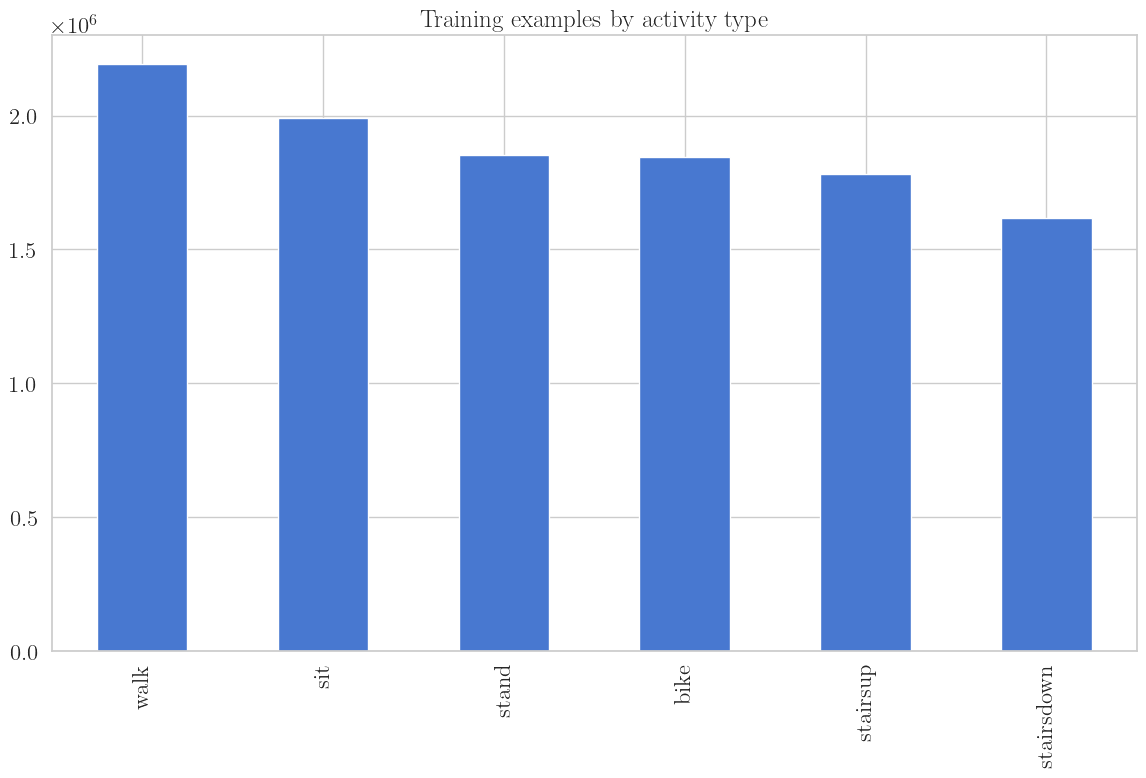

In [11]:
df['gt'].value_counts().plot(kind='bar', title='Training examples by activity type');

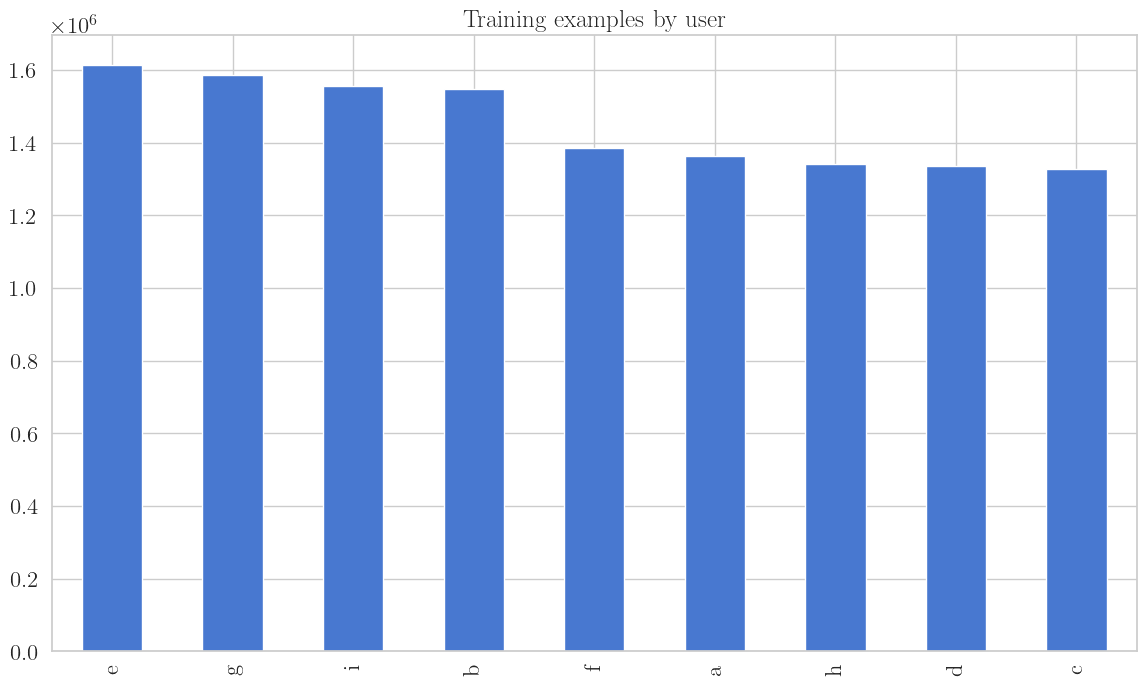

In [12]:
df['User'].value_counts().plot(kind='bar', title='Training examples by user');

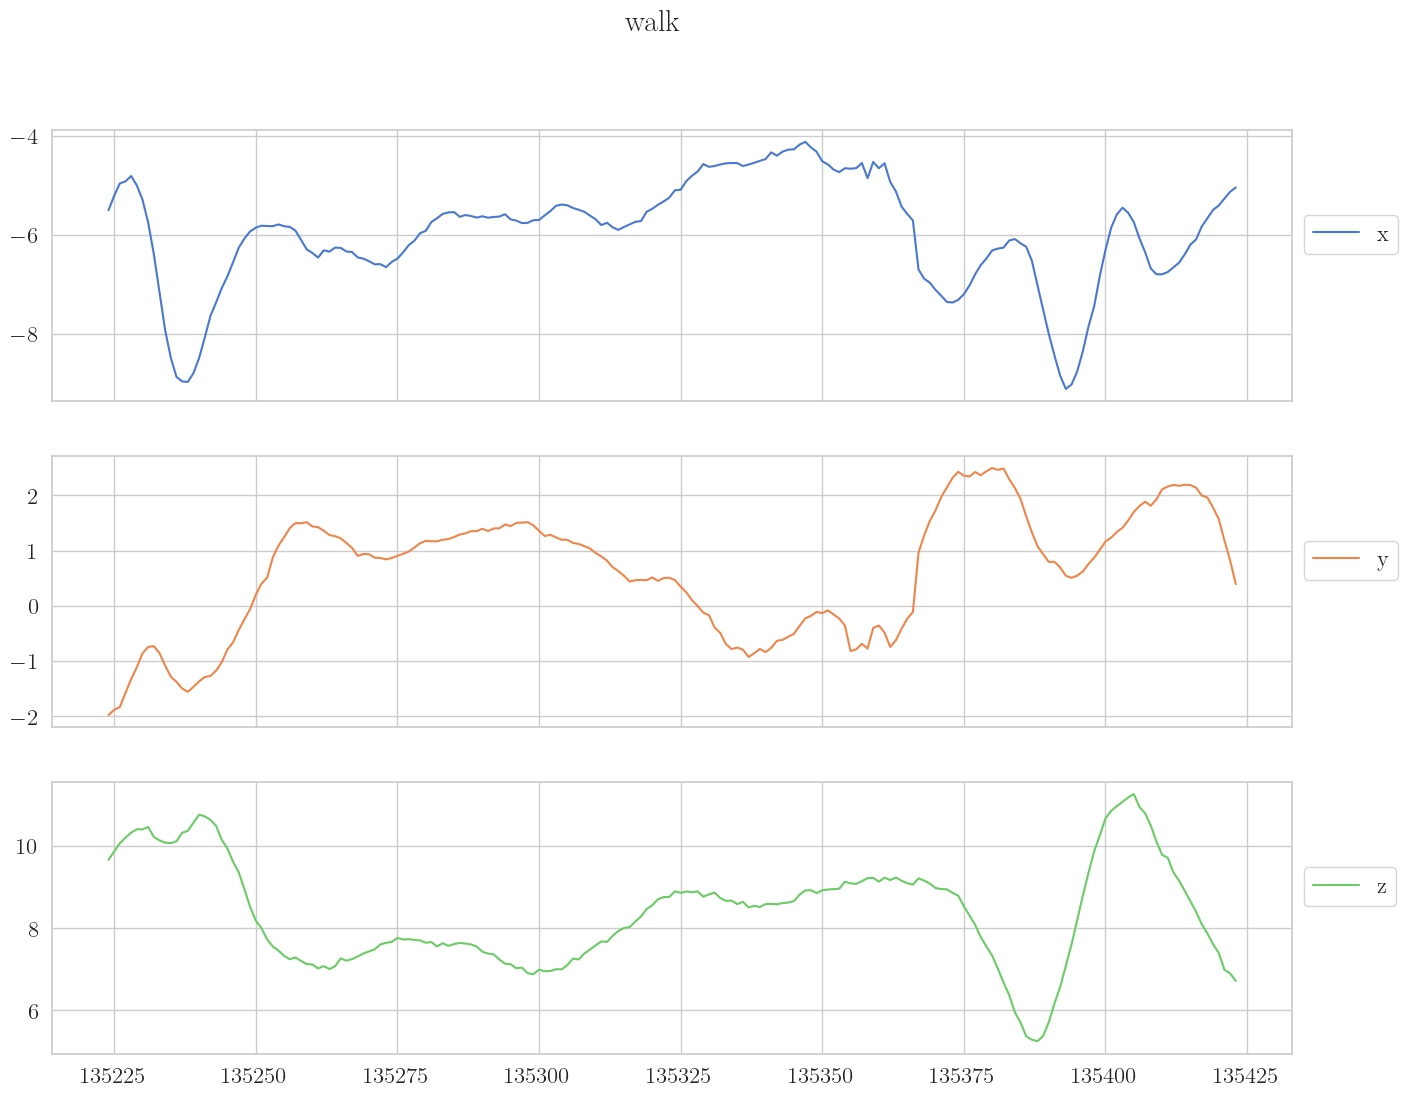

In [13]:
def plot_activity(activity, df):
    data = df[df['gt'] == activity][['x', 'y', 'z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity("walk", df)

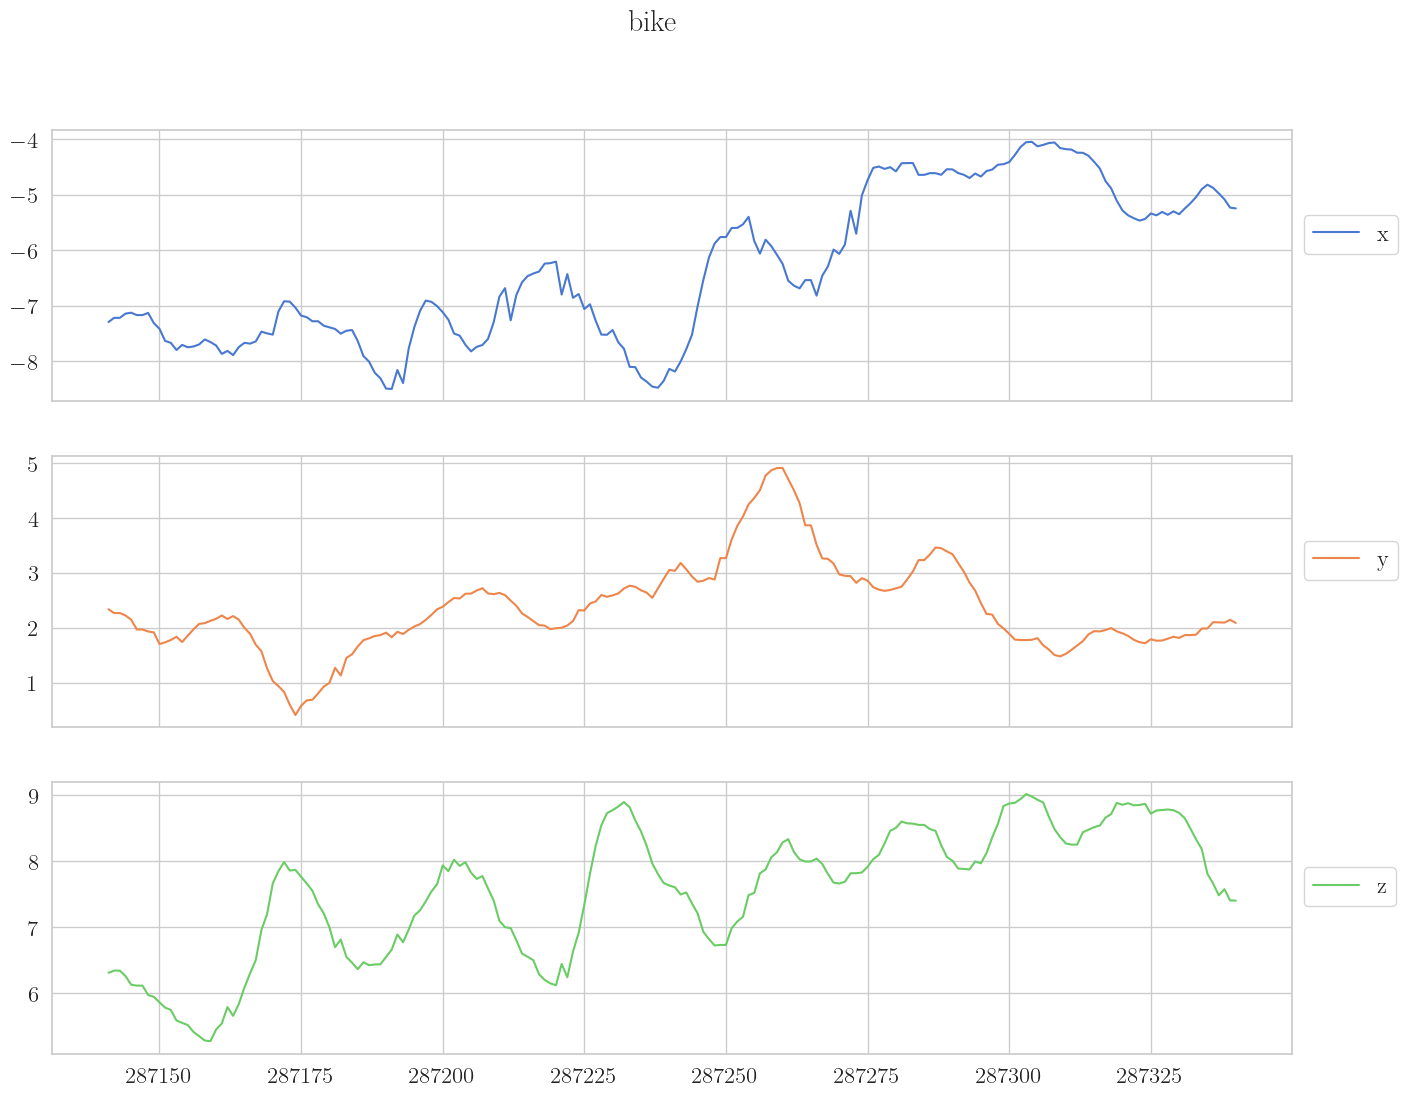

In [14]:
plot_activity("bike", df)

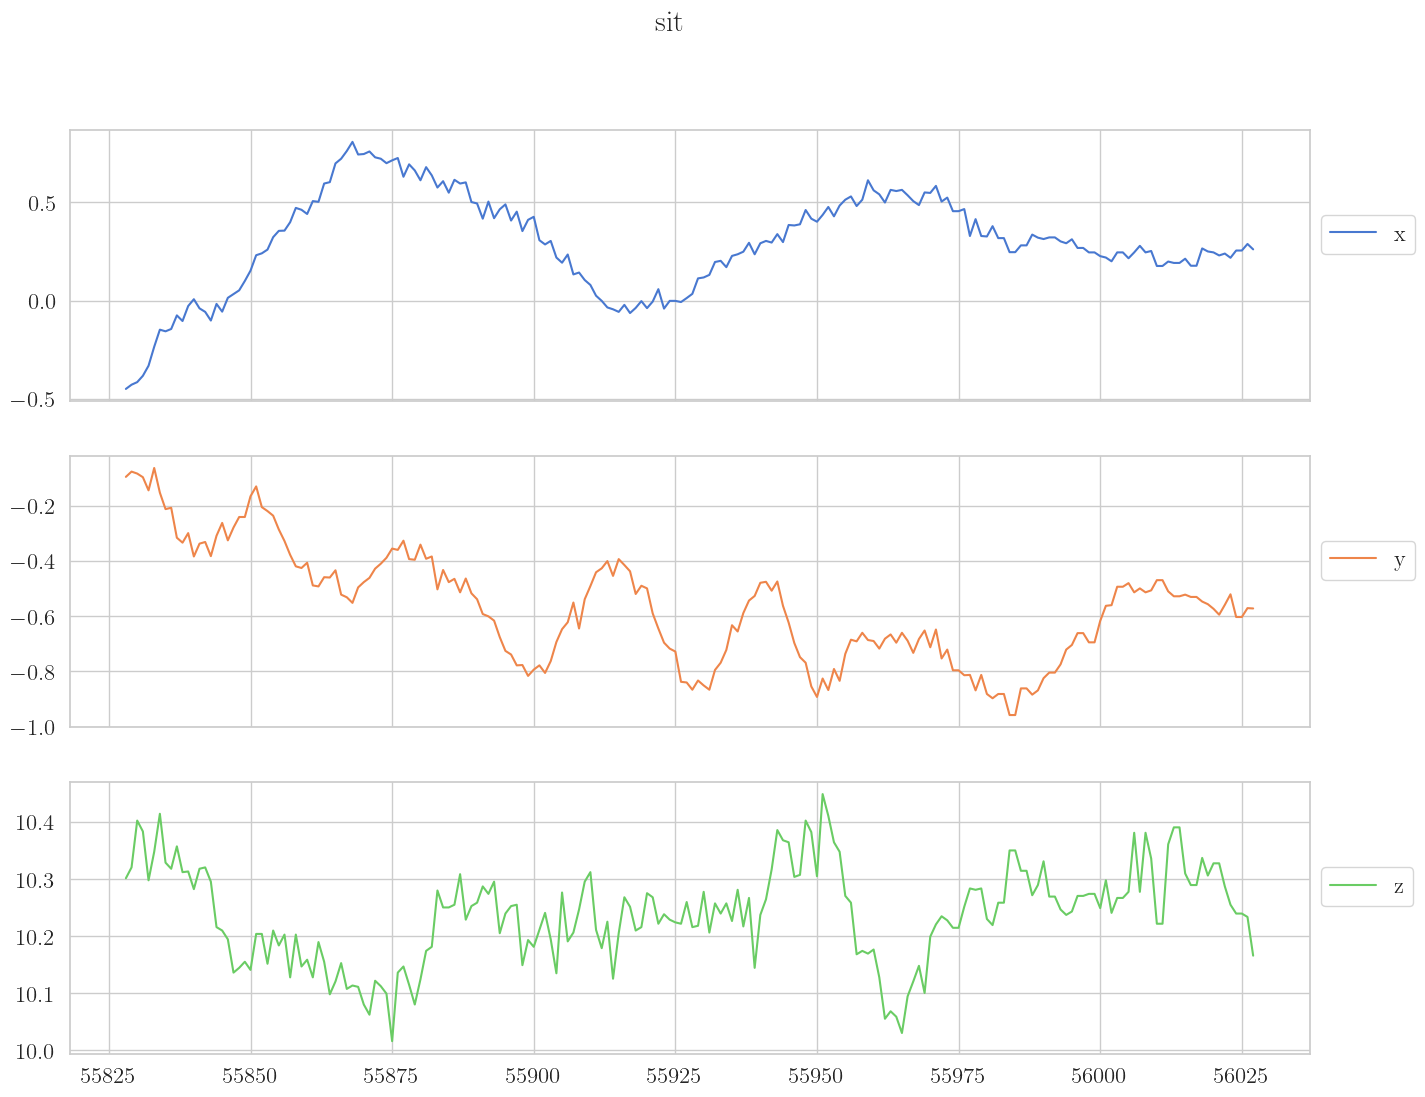

In [15]:
plot_activity("sit", df)

In [16]:
#plot_activity("null", df)

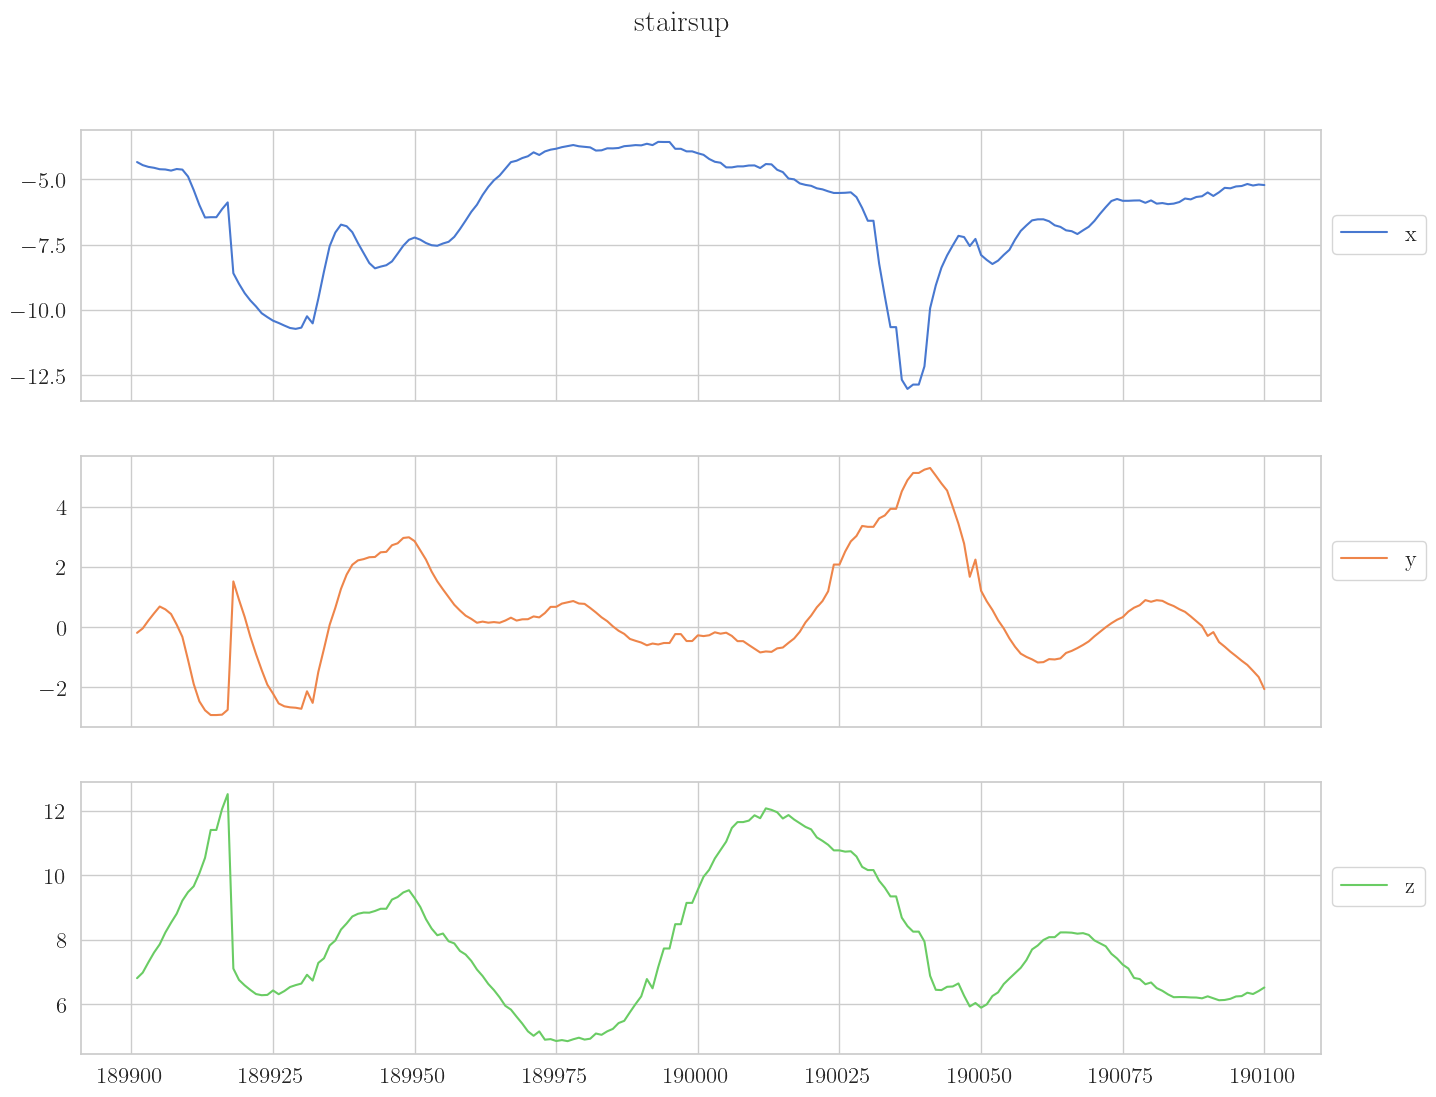

In [17]:
plot_activity("stairsup", df)

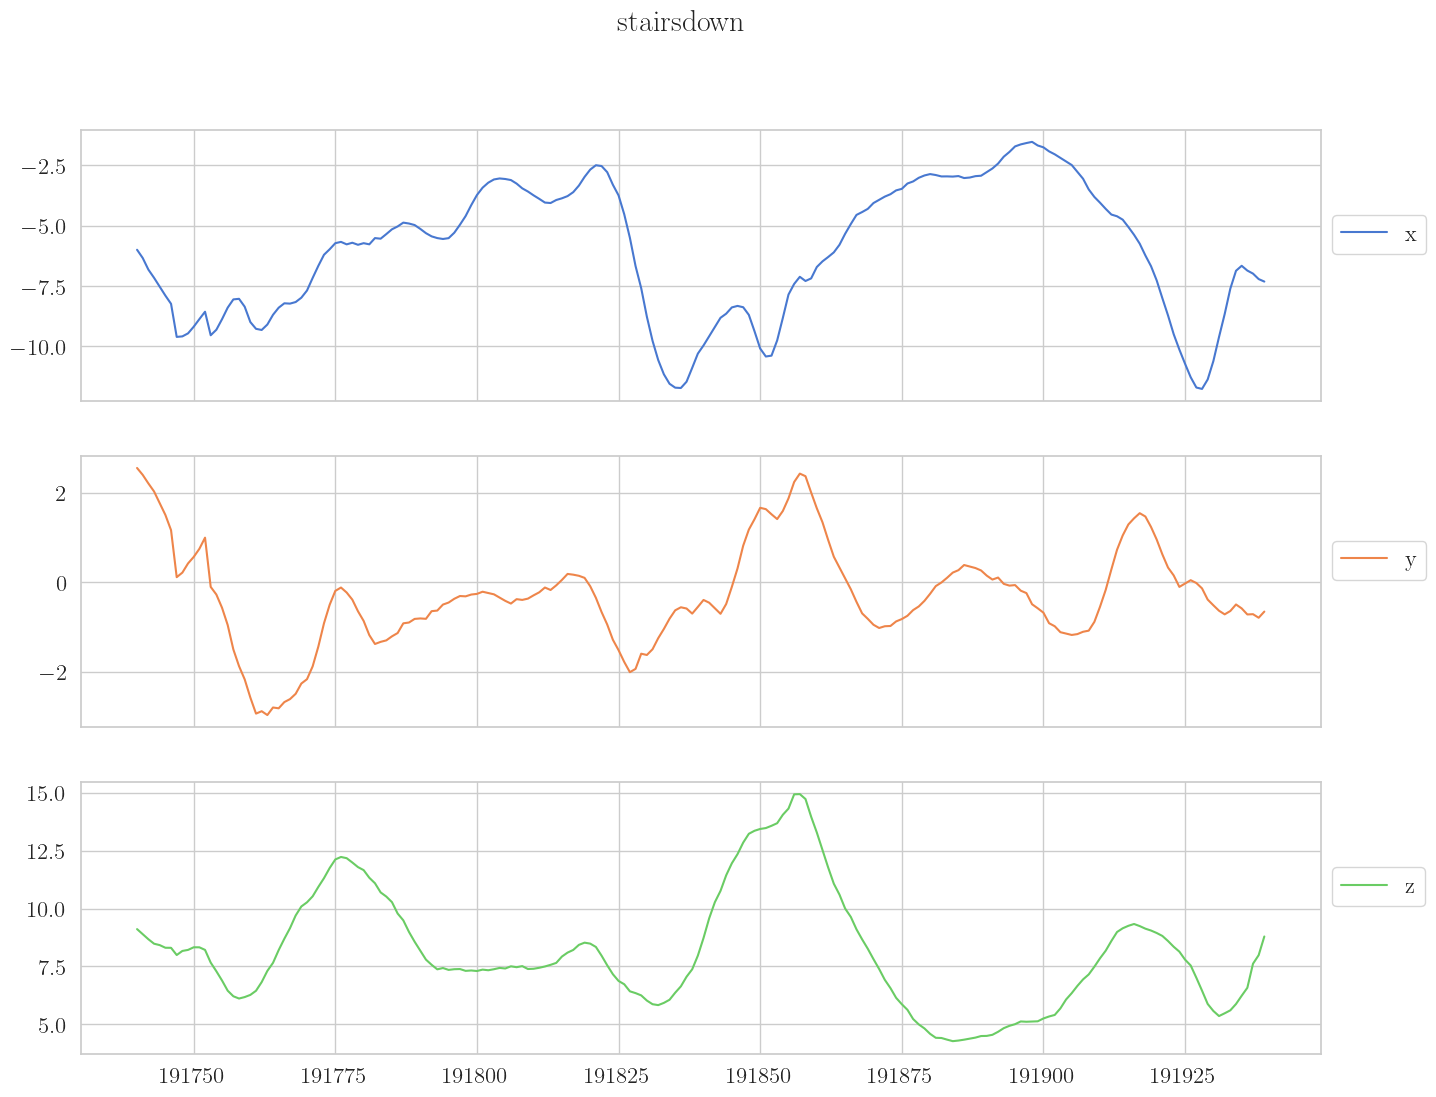

In [18]:
plot_activity("stairsdown", df)

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

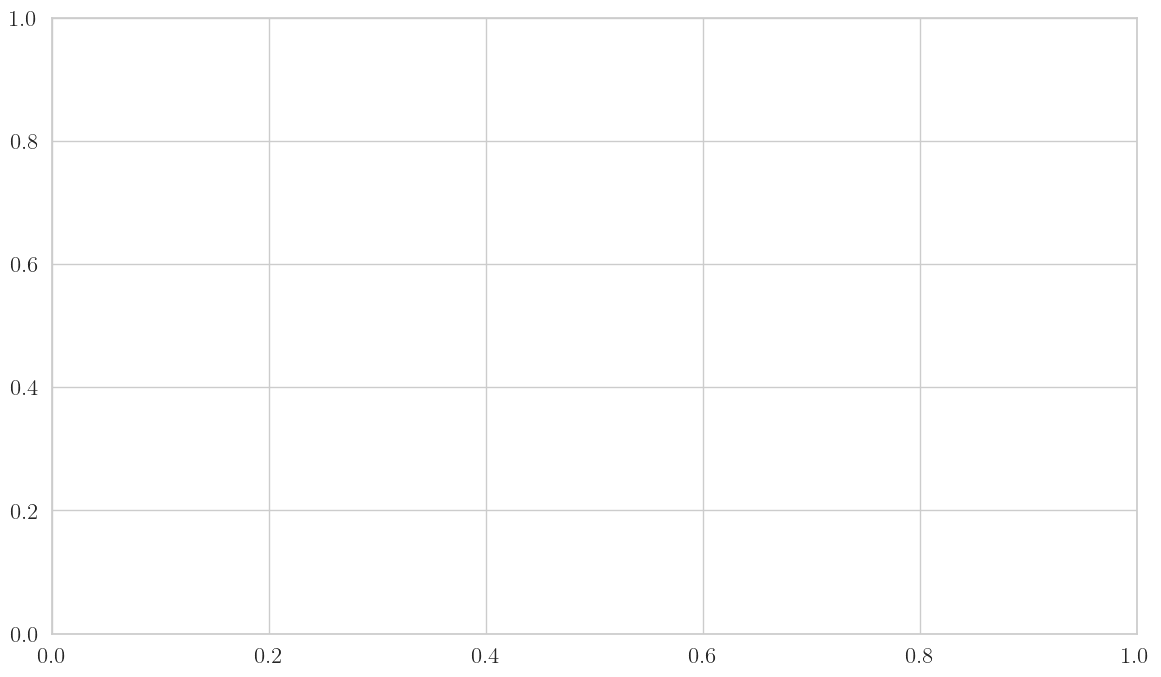

In [19]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)